<a href="https://colab.research.google.com/github/nikhilnimje220/Analysis-of-hotel-bookings/blob/master/BOOK_RECOMMENDATION_SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BOOK RECOMMENDATION SYSTEM**

# **Problem Statement**

 **During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).
Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.**

# **The Data**

The Book-Crossing dataset comprises 3 files.

● Users :
Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

● Books :
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

● Ratings :
Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

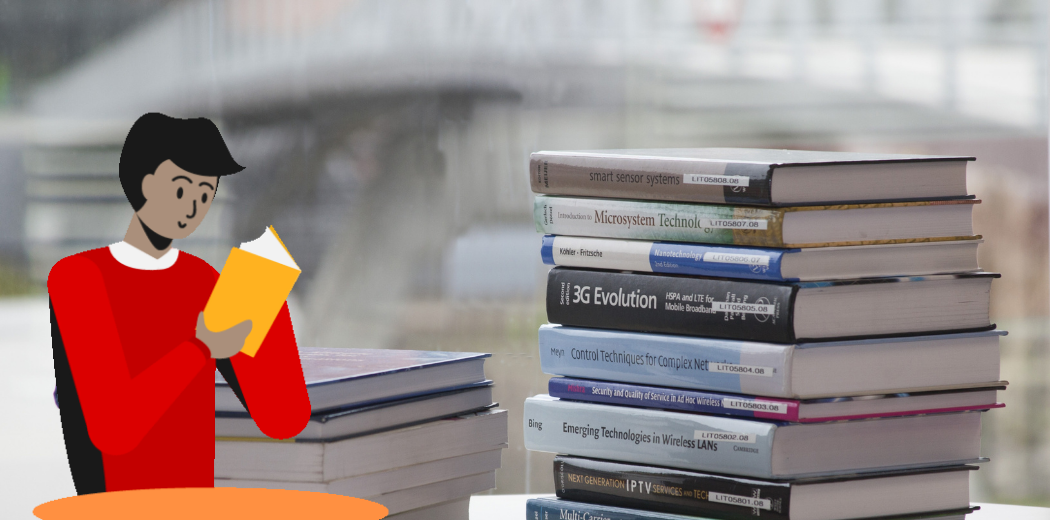

In [ ]:
Image

# **Introduction**

Today the amount of information in the internet growth very rapidly and people need some instruments to find and access appropriate information. One of such tools is called recommendation system. Recommendation systems help to navigate quickly and receive necessary information. Generally they are used in Internet shops to increase the profit. This paper proposes a quick and intuitive book recommendation system that helps readers to find appropriate book to read next. The overall architecture is presented with it's detailed description. We used a collaborative filtering method based on Pearson correlation coefficient. Finally the experimental results based on the online survey are provided with some discussions.

# **Loading Dataset and Importing Modules**

In [ ]:
# Libraries for data preparation & visualization
import numpy as np
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as pio
import seaborn as sns
import matplotlib.pyplot as plt
pio.renderers.default = "png"
import scipy
import math
import sklearn
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

# Ignore printing warnings for general readability
import warnings 
warnings.filterwarnings("ignore")

# pip install scikit-surprise
# Importing libraries for model building & evaluation
from sklearn.model_selection import train_test_split



# **Mount the drive and import the datset**

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load the seol bike data set from drive
book_data=pd.read_csv('/content/Books.csv')
user_data=pd.read_csv('/content/Users.csv')
rating_data=pd.read_csv('/content/Ratings.csv')

# **1.)Books_Dataset**

# **Data Exploration And Data Cleaning**

In [ ]:
# Viewing the data of top 5 rows to take a glimps of the data
book_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
# View the data of bottom 5 rows to take a glimps of the data
book_data.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
27685,1853833762,Fax: Messages from a Near Future,J. Wilhelm,1996.0,Kogan Page,http://images.amazon.com/images/P/1853833762.0...,http://images.amazon.com/images/P/1853833762.0...,http://images.amazon.com/images/P/1853833762.0...
27686,0446353728,The Skull Beneath the Skin,P. D. James,1994.0,Warner Books,http://images.amazon.com/images/P/0446353728.0...,http://images.amazon.com/images/P/0446353728.0...,http://images.amazon.com/images/P/0446353728.0...
27687,0553288334,Views from the Oldest House,Richard Grant,1990.0,Spectra Books,http://images.amazon.com/images/P/0553288334.0...,http://images.amazon.com/images/P/0553288334.0...,http://images.amazon.com/images/P/0553288334.0...
27688,080410753x,The Kitchen God's Wife,Amy Tan,1992.0,Ivy Books,http://images.amazon.com/images/P/080410753X.0...,http://images.amazon.com/images/P/080410753X.0...,http://images.amazon.com/images/P/080410753X.0...
27689,0525034692,"Gopher baroque, and other beastly conceits",Sandr,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check Total rows and Columns in dataset.
print(f' The shape of dataset is {(book_data.shape)} \n Total Rows are : {(book_data.shape)[0]}\n Total Columns are : {(book_data.shape)[1]}')

 The shape of dataset is (27690, 8) 
 Total Rows are : 27690
 Total Columns are : 8


In [ ]:
#Getting all the columns
print("Features of the dataset:")
book_data.columns

Features of the dataset:


Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
# Check the info of dataset to know the data types of columns or variable
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47228 entries, 0 to 47227
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 47228 non-null  object
 1   Book-Title           47228 non-null  object
 2   Book-Author          47228 non-null  object
 3   Year-Of-Publication  47228 non-null  int64 
 4   Publisher            47228 non-null  object
 5   Image-URL-S          47228 non-null  object
 6   Image-URL-M          47228 non-null  object
 7   Image-URL-L          47227 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.9+ MB


In [ ]:
#print the unique value
book_data.nunique()

ISBN                   27690
Book-Title             25809
Book-Author            13693
Year-Of-Publication       72
Publisher               3305
Image-URL-S            27679
Image-URL-M            27679
Image-URL-L            27679
dtype: int64

In [ ]:
#Looking for the description of the dataset to get insights of the data
book_data.describe(include='all')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,27690,27690,27690,27689.000000,27689,27689,27689,27689
unique,27690,25809,13693,NaN,3305,27679,27679,27679
top,0195153448,Wuthering Heights,Stephen King,NaN,Ballantine Books,http://images.amazon.com/images/P/039592720X.0...,http://images.amazon.com/images/P/039592720X.0...,http://images.amazon.com/images/P/039592720X.0...
freq,1,7,149,NaN,738,2,2,2
mean,NaN,NaN,NaN,1962.436094,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,252.068845,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1991.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1997.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2000.000000,NaN,NaN,NaN,NaN


# **Preprocessing the dataset**

**Why do we need to handle missing values?**

The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first.


In [ ]:
#check for count of missing values in each column.
book_data.isna().sum()
book_data.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    1
Publisher              1
Image-URL-S            1
Image-URL-M            1
Image-URL-L            1
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

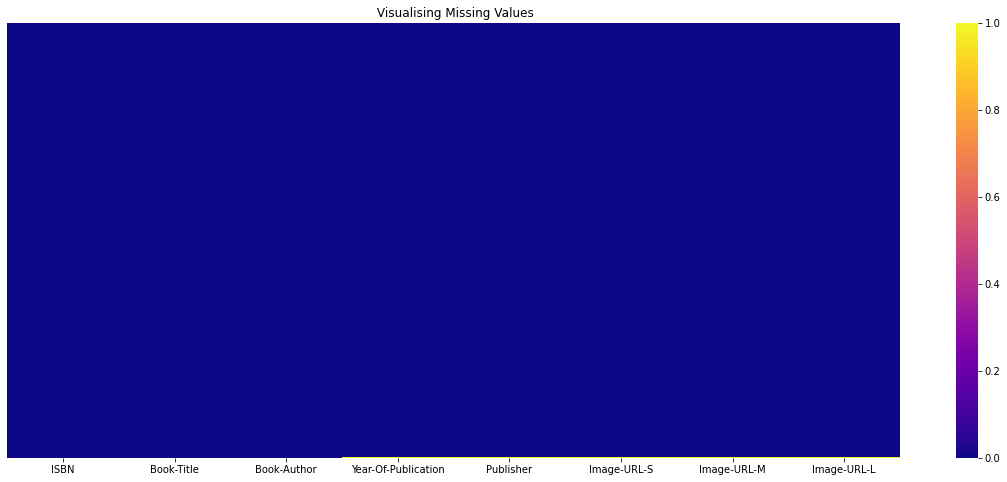

In [ ]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(book_data.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

In [ ]:
# checking Duplicate rows in our BikeData.
duplicates=book_data.duplicated().sum()
print(f"We have {duplicates} rows in our Bike Data.")

We have 0 rows in our Bike Data.


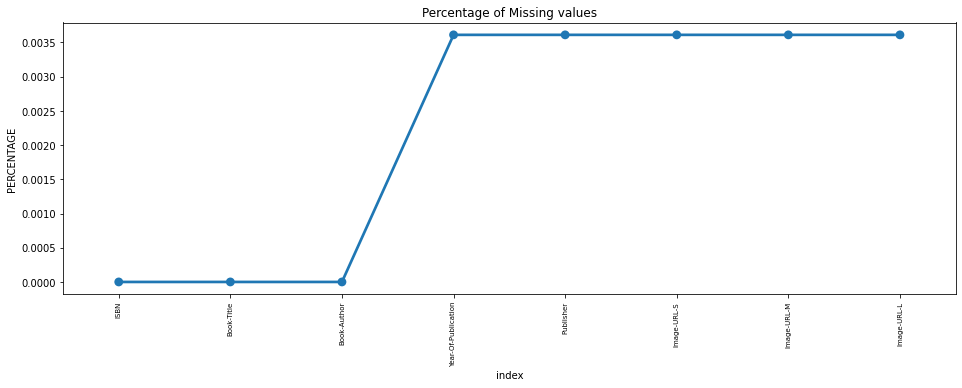

In [ ]:
missing = pd.DataFrame((book_data.isnull().sum())*100/book_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

**Top 10 Authors which have written the most books.**

Text(0.5, 1.0, 'Top 10 Authors')

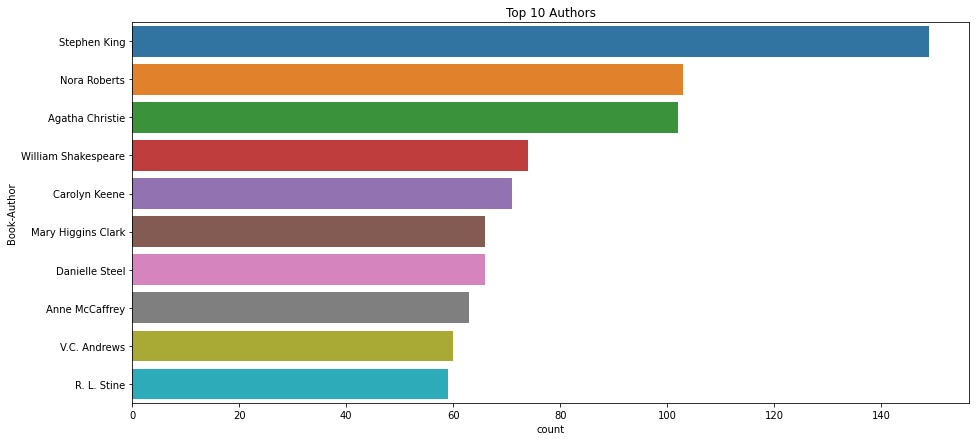

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(y='Book-Author',data=book_data,order=pd.value_counts(book_data['Book-Author']).iloc[:10].index)
plt.title('Top 10 Authors')

**Top 10 Publisher which have published the most books.**

Text(0.5, 1.0, 'Top 10 Publishers')

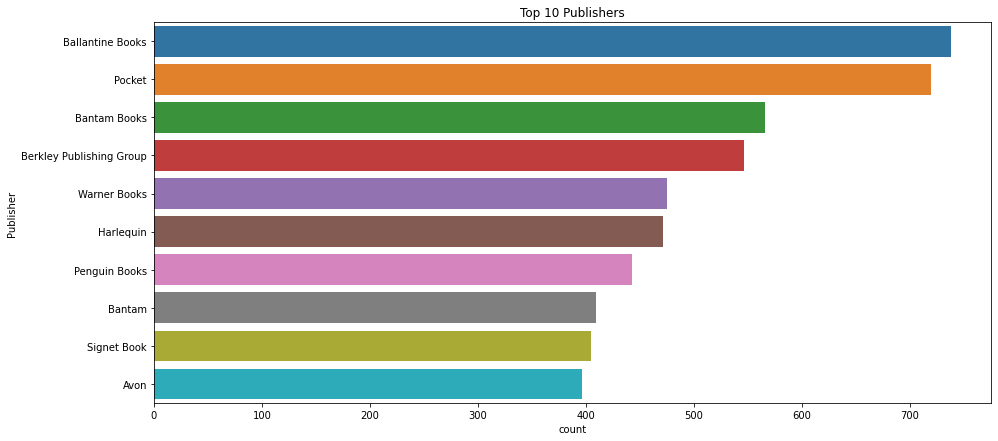

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(y='Publisher',data=book_data,order=pd.value_counts(book_data['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')

In [ ]:
book_data['Year-Of-Publication']=pd.to_numeric(book_data['Year-Of-Publication'], errors='coerce')

print(sorted(book_data['Year-Of-Publication'].unique()))
#Now it can be seen that yearOfPublication has all values as integers

[0.0, 1920.0, 1923.0, 1925.0, 1930.0, 1936.0, 1937.0, 1940.0, 1941.0, 1942.0, 1943.0, 1945.0, 1946.0, 1947.0, 1948.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2011.0, nan]


The value 0 for Year-Of_Publication is invalid and as this dataset was published in 2004, We have assumed that the years after 2006 to be invalid and setting invalid years as NaN

In [ ]:
book_data.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    1
Publisher              1
Image-URL-S            1
Image-URL-M            1
Image-URL-L            1
dtype: int64

In [ ]:
#Filling Nan of Publisher with others
book_data.Publisher.fillna('other',inplace=True)

In [ ]:
#Filling Nan of Book-Author with others
book_data['Book-Author'].fillna('other',inplace=True)

In [ ]:
book_data.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    1
Publisher              0
Image-URL-S            1
Image-URL-M            1
Image-URL-L            1
dtype: int64

# **2.)Users_Dataset**

# **Data Exploration And Data Cleaning**

In [ ]:
# Viewing the data of top 5 rows to take a glimps of the data
user_data.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
# View the data of bottom 5 rows to take a glimps of the data
user_data.tail()

,User-ID,Location,Age
186833,186834,"hanford, california, usa",54.0
186834,186835,"tampa, florida, usa",NaN
186835,186836,"scotland, renfrewshire, united kingdom",23.0
186836,186837,"schofield, wisconsin, usa",39.0
186837,18683,NaN,NaN


In [ ]:
# Check Total rows and Columns in dataset.
print(f' The shape of dataset is {(user_data.shape)} \n Total Rows are : {(user_data.shape)[0]}\n Total Columns are : {(user_data.shape)[1]}')

 The shape of dataset is (186838, 3) 
 Total Rows are : 186838
 Total Columns are : 3


In [ ]:
#Getting all the columns
print("Features of the dataset:")
user_data.columns

Features of the dataset:


Index(['User-ID', 'Location', 'Age'], dtype='object')

In [ ]:
# Check the info of dataset to know the data types of columns or variable
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186838 entries, 0 to 186837
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   186838 non-null  int64  
 1   Location  186837 non-null  object 
 2   Age       112611 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.3+ MB


In [ ]:
#print the unique value
user_data.nunique()

User-ID     186837
Location     43854
Age            151
dtype: int64

In [ ]:
#Looking for the description of the dataset to get insights of the data
user_data.describe(include='all')

,User-ID,Location,Age
count,186838.000000,186837,112611.000000
unique,NaN,43854,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,1679,NaN
mean,93418.599996,NaN,34.770520
std,53935.473256,NaN,14.436054
min,1.000000,NaN,0.000000
25%,46709.250000,NaN,24.000000
50%,93418.500000,NaN,32.000000
75%,140127.750000,NaN,44.000000


# **Preprocessing the dataset**

**Why do we need to handle missing values?**

The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first.

**Missing values**

In [ ]:
#check for count of missing values in each column.
user_data.isna().sum()
user_data.isnull().sum()

User-ID         0
Location        1
Age         74227
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

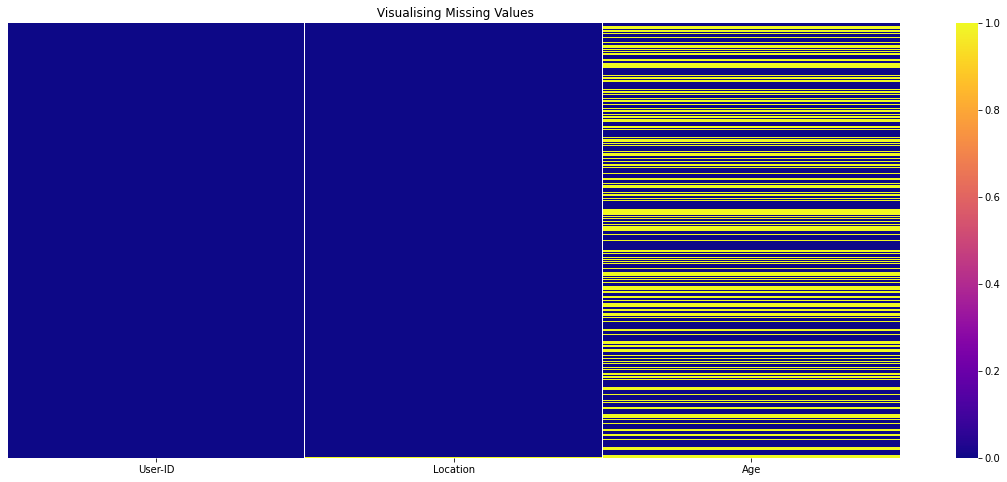

In [ ]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(user_data.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

In [ ]:
# checking Duplicate rows in our BikeData.
duplicates=user_data.duplicated().sum()
print(f"We have {duplicates} rows in our user Data.")

We have 0 rows in our user Data.


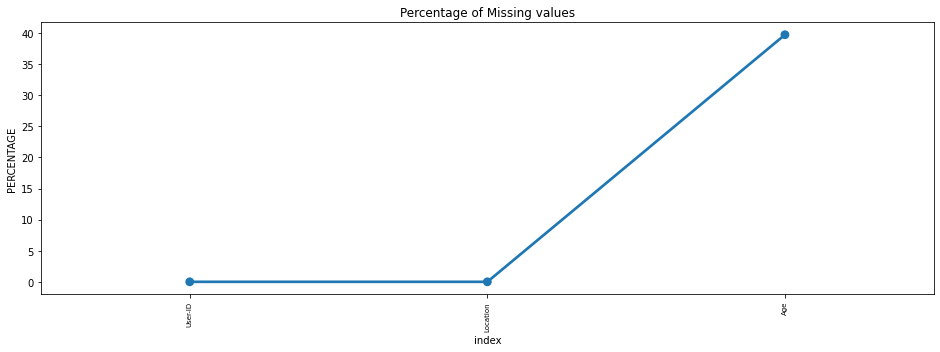

In [ ]:
missing = pd.DataFrame((user_data.isnull().sum())*100/user_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

**Age Distribution**

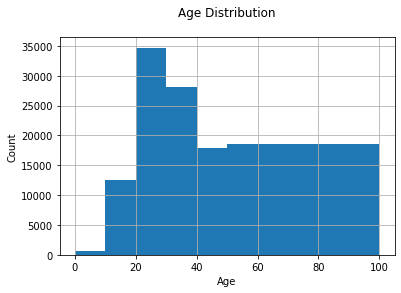

In [ ]:
user_data.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The most active users are among those in their 20–30s.

Text(0.5, 1.0, 'Find outlier data in Age column')

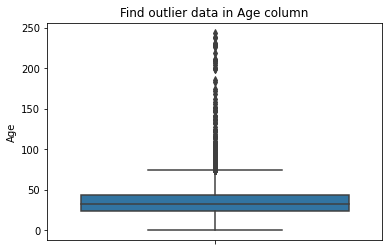

In [ ]:
#Let's check for outliers in age column
sns.boxplot(y='Age', data=user_data)
plt.title('Find outlier data in Age column')

In [ ]:
print(sorted(user_data.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 108.0, 109.0, 110.0, 114.0, 115.0, 116.0, 119.0, 123.0, 124.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 141.0, 147.0, 148.0, 151.0, 152.0, 156.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 199.0, 200.0, 201.0, 204.0, 207.0, 209.0, 210.0, 212.0, 219.0, 226.0, 228.0, 229.0, 230.0, 231.0, 237.0, 239.0, 244.0]


Age : 244

Ok we have Outlier data in Age

In [ ]:
#Let's find our unique value in Location column
user_data.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'indianapolis, indiana, united kingdom',
       'scotland, renfrewshire, united kingdom', nan], dtype=object)

In [ ]:
user_data.Location.nunique()

43854

18782 unique Value it's really hard to understand

So lets create column Country

In [ ]:
for i in user_data:
    user_data['Country']=user_data.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [ ]:
user_data.Country.nunique()

419

In [ ]:
user_data.head(2)

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa


In [ ]:
user_data.isnull().sum()

User-ID         0
Location        1
Age         74227
Country       243
dtype: int64

In [ ]:
user_data['Country']=user_data['Country'].astype('str')

In [ ]:
a=list(user_data.Country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '02458', '19104', '23232', '87510', '_ brasil', 'aaa', 'adsgfdr', 'afghanistan', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bladen', 'bolivia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bulgaria', 'burkina faso', 'burkinafasu', 'burma', 'c', 'calabria', 'cambodia', 'camden', 'cameroon', 'can', 'canada', 'cananda', 'canda', 'cape town', 'cape verde', 'caribbean sea', 'carter', 'cass', 'catalonia', 'catalunya', 'catalunya spain', 'cayman islands', 'chad', 'channel islands', 'c

Text(0.5, 1.0, 'Count of users Country wise')

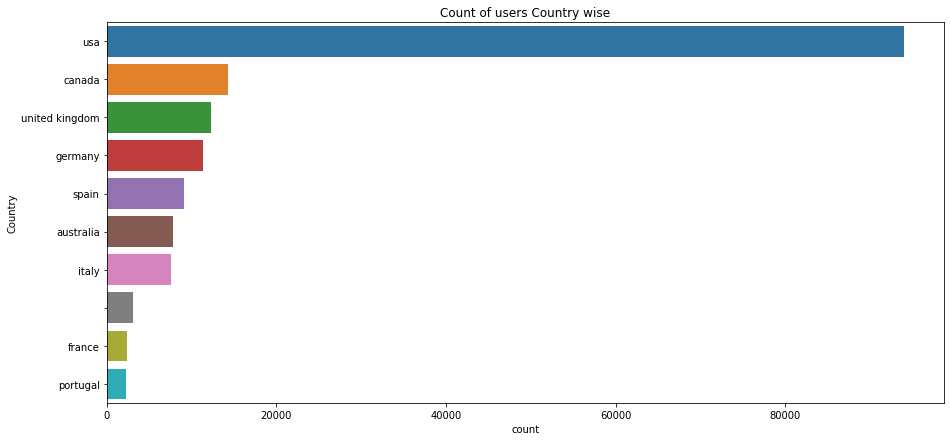

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(y='Country',data=user_data,order=pd.value_counts(user_data['Country']).iloc[:10].index)
plt.title('Count of users Country wise')

Most number of users are from USA

Text(0.5, 1.0, 'Age Distribution Plot')

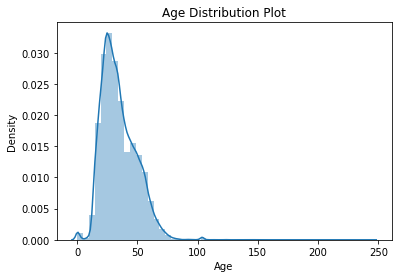

In [ ]:
#Let's treat outliers in users age
sns.distplot(user_data.Age)
plt.title('Age Distribution Plot')

Age value's below 5 and above 100 do not make much sense for our book rating case...hence replacing these by NaNs

In [ ]:
# outlier data became NaN
user_data.loc[(user_data.Age > 100) | (user_data.Age < 5), 'Age'] = np.nan

In [ ]:
user_data.isna().sum()

User-ID         0
Location        1
Age         75060
Country         0
dtype: int64

Age has positive Skewness (right tail) so we can use median to fill Nan values, but for this we don't like to fill Nan value just for one range of age. To handle this we'll use country column to fill Nan.

In [ ]:
user_data['Age'] = user_data['Age'].fillna(user_data.groupby('Country')['Age'].transform('median'))

In [ ]:
user_data.isna().sum()

User-ID       0
Location      1
Age         203
Country       0
dtype: int64

Still we have 77 Nan values let's fill them with mean

In [ ]:
user_data['Age'].fillna(user_data.Age.mean(),inplace=True)

In [ ]:
user_data.isna().sum()

User-ID     0
Location    1
Age         0
Country     0
dtype: int64

# **3.)Ratings_Dataset**

# **Data Exploration And Data Cleaning**

In [ ]:
# Viewing the data of top 5 rows to take a glimps of the data
rating_data.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [ ]:
# View the data of bottom 5 rows to take a glimps of the data
rating_data.tail()

,User-ID,ISBN,Book-Rating
386013,93092,0156628708,0.0
386014,93092,0192833634,0.0
386015,93092,0192833677,9.0
386016,93092,0192833715,8.0
386017,93092,019283,NaN


In [ ]:
# Check Total rows and Columns in dataset.
print(f' The shape of dataset is {(rating_data.shape)} \n Total Rows are : {(rating_data.shape)[0]}\n Total Columns are : {(rating_data.shape)[1]}')

 The shape of dataset is (386018, 3) 
 Total Rows are : 386018
 Total Columns are : 3


In [ ]:
#Getting all the columns
print("Features of the dataset:")
rating_data.columns

Features of the dataset:


Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [ ]:
# Check the info of dataset to know the data types of columns or variable
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386018 entries, 0 to 386017
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   User-ID      386018 non-null  int64  
 1   ISBN         386018 non-null  object 
 2   Book-Rating  386017 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.8+ MB


In [ ]:
#print the unique value
rating_data.nunique()

User-ID         36115
ISBN           169579
Book-Rating        11
dtype: int64

In [ ]:
#Looking for the description of the dataset to get insights of the data
rating_data.describe(include = 'all')

,User-ID,ISBN,Book-Rating
count,386018.000000,386018,386017.000000
unique,NaN,169579,NaN
top,NaN,0971880107,NaN
freq,NaN,852,NaN
mean,51811.887464,NaN,2.994376
std,44519.381939,NaN,3.892684
min,2.000000,NaN,0.000000
25%,24195.000000,NaN,0.000000
50%,45956.500000,NaN,0.000000
75%,70931.000000,NaN,7.000000


In [ ]:
ratings_new = rating_data[rating_data.ISBN.isin(book_data.ISBN)]
rating_data.shape,ratings_new.shape

((386018, 3), (167694, 3))

# **Preprocessing the dataset**

**Why do we need to handle missing values?**

The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first.

**Missing values**

In [ ]:
#check for count of missing values in each column.
rating_data.isna().sum()
rating_data.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    1
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

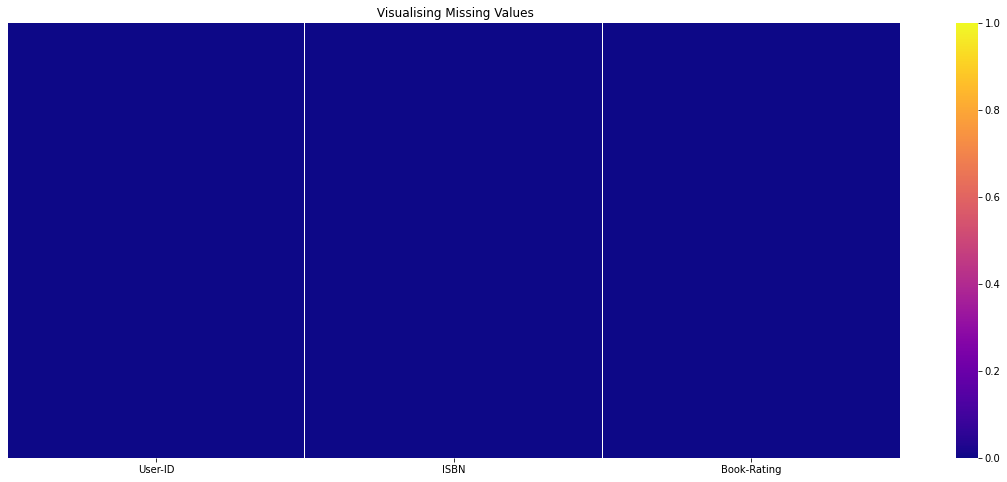

In [ ]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(rating_data.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

In [ ]:
# checking Duplicate rows in our BikeData.
duplicates=rating_data.duplicated().sum()
print(f"We have {duplicates} rows in our rating Data.")

We have 0 rows in our rating Data.


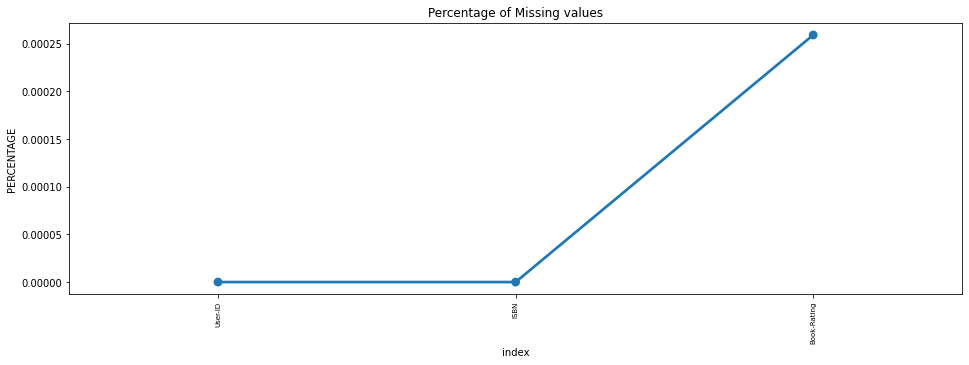

In [ ]:
missing = pd.DataFrame((rating_data.isnull().sum())*100/rating_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

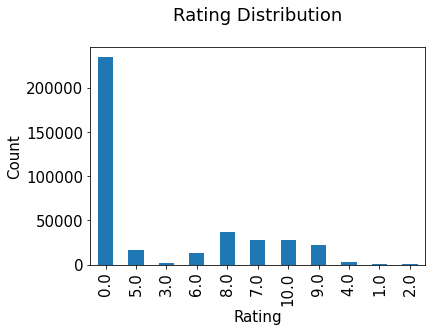

In [ ]:
plt.rc("font", size=15)
rating_data['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

The ratings are very unevenly distributed, and the vast majority of ratings are 0 .As quoted in the description of the dataset - BX-Book-Ratings contains the book rating information. Ratings are either explicit, expressed on a scale from 1-10 higher values denoting higher appreciation, or implicit, expressed by 0.Hence segragating implicit and explict ratings datasets

In [ ]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = ratings_new[ratings_new['Book-Rating'] != 0]
ratings_implicit = ratings_new[ratings_new['Book-Rating'] == 0]

In [ ]:
print('ratings_explicit dataset shape',ratings_explicit.shape)
print('ratings_implicit dataset',ratings_implicit.shape)

ratings_explicit dataset shape (66630, 3)
ratings_implicit dataset (101064, 3)


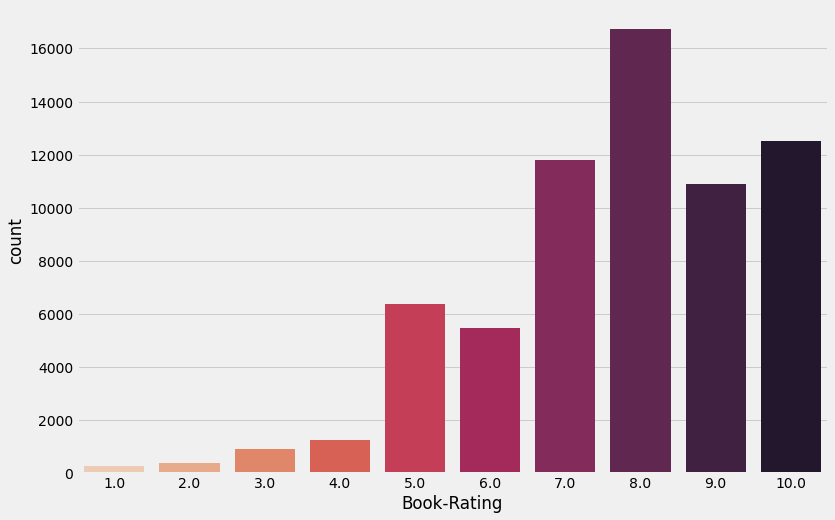

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings_explicit , x='Book-Rating', palette='rocket_r')

It can be observe that higher ratings are more common amongst users and rating 8 has been rated highest number of times

In [ ]:
#Let's find the top 5 books which are rated by most number of users.
rating_count = pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
0316666343,237
0971880107,206
0385504209,173
0312195516,125
0060928336,121


The book with ISBN '0316666343' received the most rating counts. Let’s find out what book it is, and what books are in the top 5.

In [ ]:
most_rated_books = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, book_data, on='ISBN')
most_rated_books_summary

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
1,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...
4,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...


The book that received the most rating counts in this data set is Alice Sebold “The Lovely Bones: A Novel”. And there is something in common among these five books that received the most rating counts — they are all novels. So it is conclusive that novels are popular and likely receive more ratings.

In [ ]:
# Create column Rating average 
ratings_explicit['Avg_Rating']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('mean')
# Create column Rating sum
ratings_explicit['Total_No_Of_Users_Rated']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')

In [ ]:
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
8,276744,038550120X,7.0,8.000000,24
16,276747,0060517794,9.0,8.636364,11
19,276747,0671537458,9.0,7.428571,7
20,276747,0679776818,8.0,7.750000,8
28,276754,0684867621,8.0,6.958333,24


# **Merging All Dataset.**

In [ ]:
Final_Dataset=user_data.copy()
Final_Dataset=pd.merge(Final_Dataset,ratings_explicit,on='User-ID')
Final_Dataset=pd.merge(Final_Dataset,book_data,on='ISBN')

In [ ]:
Final_Dataset.head()

,User-ID,Location,Age,Country,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,8,"timmins, ontario, canada",33.0,canada,0002005018,5.0,7.0,3,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
1,11676,"n/a, n/a, n/a",28.0,nan,0002005018,8.0,7.0,3,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,67544,"toronto, ontario, canada",30.0,canada,0002005018,8.0,7.0,3,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,8,"timmins, ontario, canada",33.0,canada,074322678X,5.0,5.0,1,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...
4,8,"timmins, ontario, canada",33.0,canada,0887841740,5.0,5.0,1,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...


In [ ]:
Final_Dataset.shape

(65650, 15)

# **Exploratory Data Analysis**

In [ ]:

print('Average book rating: ', round(Final_Dataset['Book-Rating'].mean(), 2))


Average book rating:  7.71


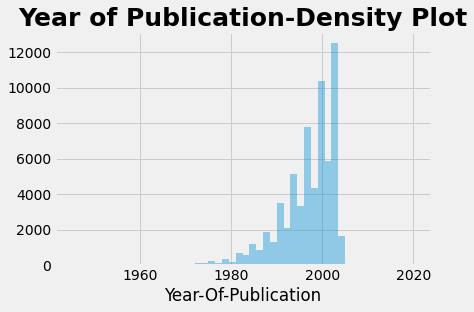

In [ ]:
year = pd.to_numeric(Final_Dataset['Year-Of-Publication'], errors='coerce').fillna(2099, downcast = 'infer')
sns.distplot(year, kde=False, hist_kws={"range": [1945,2020]},).set_title('Year of Publication-Density Plot', weight='bold').set_fontsize('25')

Most books got published in early 2000's

# **Customer Geography Analysis**

In [ ]:
def get_country(x):
  return x.split(',')[-1]

In [ ]:
book_data.loc[book_data['ISBN'].str.endswith('X')].head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...
11,080652121X,Hitler's Secret Bankers: The Myth of Swiss Neu...,Adam Lebor,2000.0,Citadel Press,http://images.amazon.com/images/P/080652121X.0...,http://images.amazon.com/images/P/080652121X.0...,http://images.amazon.com/images/P/080652121X.0...
40,038078243X,Miss Zukas and the Raven's Dance,Jo Dereske,1996.0,Avon,http://images.amazon.com/images/P/038078243X.0...,http://images.amazon.com/images/P/038078243X.0...,http://images.amazon.com/images/P/038078243X.0...
41,055321215X,Pride and Prejudice,Jane Austen,1983.0,Bantam,http://images.amazon.com/images/P/055321215X.0...,http://images.amazon.com/images/P/055321215X.0...,http://images.amazon.com/images/P/055321215X.0...
42,067176537X,The Therapeutic Touch: How to Use Your Hands t...,Dolores Krieger,1979.0,Fireside,http://images.amazon.com/images/P/067176537X.0...,http://images.amazon.com/images/P/067176537X.0...,http://images.amazon.com/images/P/067176537X.0...


# **Popularity Based Filtering**
As the name suggests Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any book which is usually bought by every new user then there are chances that it may suggest that book to the user who just signed up.
Book weighted avg formula:

Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]
where,

v is the number of votes for the books;

m is the minimum votes required to be listed in the chart;

R is the average rating of the book; and

C is the mean vote across the whole report.

Now we find the values of v,m,R,C.

In [ ]:
C= Final_Dataset['Avg_Rating'].mean()
m= Final_Dataset['Total_No_Of_Users_Rated'].quantile(0.90)
Top_Books = Final_Dataset.loc[Final_Dataset['Total_No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape

C=7.705479424915314 , m=41.0


(6584, 15)

Here we used 90th percentile as our cutoff. In other words, for a book to feature in the charts, it must have more votes than at least 90% of the books in the list.
We see that there are 1382 books which qualify to be in this list. Now, we need to calculate our metric for each qualified book. To do this, we will define a function, weighted_rating() and define a new feature score, of which we’ll calculate the value by applying this function to our DataFrame of qualified books:

In [ ]:
ratings_count = pd.DataFrame(ratings_explicit.groupby(['ISBN'])['Book-Rating'].sum())
top10 = ratings_count.sort_values('Book-Rating', ascending = False).head(10)
print("Following books are recommended")
top10.merge(book_data, left_index = True, right_on = 'ISBN')

Following books are recommended


,Book-Rating,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
408,1944.0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
748,1489.0,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
522,1059.0,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...
26,964.0,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
2143,963.0,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999.0,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...
1105,954.0,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
356,922.0,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003.0,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...
706,839.0,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998.0,Warner Books,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...
118,789.0,0671027360,Angels &amp; Demons,Dan Brown,2001.0,Pocket Star,http://images.amazon.com/images/P/0671027360.0...,http://images.amazon.com/images/P/0671027360.0...,http://images.amazon.com/images/P/0671027360.0...
305,748.0,044023722X,A Painted House,John Grisham,2001.0,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...


In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['Total_No_Of_Users_Rated']
    R = x['Avg_Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)
    
 
Top_Books['Score'] = Top_Books.apply(weighted_rating,axis=1)
 
 
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)
#Keeping only one entry of each book
Top_Books=Top_Books.sort_values('Score', ascending=False).drop_duplicates('ISBN').sort_index()
cm=sns.light_palette('yellow',as_cmap=True)
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

#Printing the top 20 books
Top_Books[['Book-Title', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score']].reset_index(drop=True).head(20).style.background_gradient(cmap=cm)

,Book-Title,Total_No_Of_Users_Rated,Avg_Rating,Score
0,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),107,9.000000,8.641383
1,To Kill a Mockingbird,79,8.987342,8.549372
2,Harry Potter and the Goblet of Fire (Book 4),42,9.333333,8.529213
3,Harry Potter and the Order of the Phoenix (Book 5),65,9.015385,8.508723
4,Harry Potter and the Chamber of Secrets (Book 2),60,8.966667,8.454700
5,The Da Vinci Code,173,8.606936,8.434227
6,Harry Potter and the Prisoner of Azkaban (Book 3),41,9.121951,8.413715
7,A Prayer for Owen Meany,66,8.757576,8.354436
8,Harry Potter and the Prisoner of Azkaban (Book 3),47,8.893617,8.340053
9,Fahrenheit 451,59,8.779661,8.339247



The Popularity based recommender provide a general chart of recommended books to all the users. They are not sensitive to the interests and tastes of a particular user.

# **Model Based Collaborative Filtering Recommender**

The goal of the recommender system is to predict user preference for a set of items based on the past experience. Two the most popular approaches are Content-Based and Collaborative Filtering.

Collaborative filtering is a technique used by websites like Amazon, YouTube, and Netflix. It filters out items that a user might like on the basis of reactions of similar users.

There are two categories of collaborative filtering algorithms: memory based and model based.

Model based approach involves building machine learning algorithms to predict user's ratings. They involve dimensionality reduction methods that reduce high dimensional matrix containing abundant number of missing values with a much smaller matrix in lower-dimensional space.

The goal of this section is to compare SVD and NMF algorithms, try different configurations of parameters and explore obtained results.

This analysis will focus on book recommendations based on Book-Crossing dataset. To reduce the dimensionality of the dataset and avoid running into memory error we will focus on users with at least 3 ratings and top 10% most frequently rated books.
The recommender systems will be built using surprise package (Matrix Factorization - based models).

In [ ]:
ratings_explicit.rename(columns = {'User-ID':'user_id' ,'ISBN':'isbn' ,'Book-Rating':'book_rating'},inplace=True)

In [ ]:

user_ratings_threshold = 3

filter_users = ratings_explicit['user_id'].value_counts()
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()

df_ratings_top = ratings_explicit[ratings_explicit['user_id'].isin(filter_users_list)]

print('Filter: users with at least %d ratings\nNumber of records: %d' % (user_ratings_threshold, len(df_ratings_top)))

Filter: users with at least 3 ratings
Number of records: 52673


In [ ]:

book_ratings_threshold_perc = 0.1
book_ratings_threshold = len(df_ratings_top['isbn'].unique()) * book_ratings_threshold_perc

filter_books_list = df_ratings_top['isbn'].value_counts().head(int(book_ratings_threshold)).index.to_list()
df_ratings_top = df_ratings_top[df_ratings_top['isbn'].isin(filter_books_list)]

print('Filter: top %d%% most frequently rated books\nNumber of records: %d' % (book_ratings_threshold_perc*100, len(df_ratings_top)))

Filter: top 10% most frequently rated books
Number of records: 23620


SVD and NMF models comparison
Singular Value Decomposition (SVD) and Non-negative Matrix Factorization (NMF) are matrix factorization techniques used for dimensionality reduction. Surprise package provides implementation of those algorithms.

In [ ]:
pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 5.3 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633726 sha256=195c6a5178e6df45115d7e211de4a58544eb30026cafa136240ed0ba0e6982ac
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [ ]:
df=df_ratings_top.copy()
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user_id', 'isbn', 'book_rating']], reader)

In [ ]:
model_svd = SVD()
cv_results_svd = cross_validate(model_svd, data, cv=3)
pd.DataFrame(cv_results_svd).mean()

test_rmse    1.646443
test_mae     1.277272
fit_time     1.123473
test_time    0.065098
dtype: float64

In [ ]:
model_nmf = NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=3)
pd.DataFrame(cv_results_nmf).mean()

test_rmse    2.726780
test_mae     2.335664
fit_time     1.612273
test_time    0.071213
dtype: float64

It's clear that for the given dataset much better results can be obtained with NMF approach - both in terms of accuracy and training / testing time.

**Optimisation of SVD algorithm**

Grid Search Cross Validation computes accuracy metrics for an algorithm on various combinations of parameters, over a cross-validation procedure. It's useful for finding the best configuration of parameters.

It is used to find the best setting of parameters:

n_factors - the number of factors

n_epochs - the number of iteration of the SGD procedure

lr_all - the learning rate for all parameters

reg_all - the regularization term for all parameters

As a result, regarding the majority of parameters, the default setting is the most optimal one. The improvement obtained with Grid Search is very small.

In [ ]:
param_grid = {'n_factors': [80,100],
              'n_epochs': [5, 20],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.2, 0.4]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.64304391929119
{'n_factors': 80, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}



**
# Collaborative Filtering based Recommendation System--(Item-Item Based)**

In [ ]:
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import numpy as np
import os, sys
import re
from scipy.sparse import csr_matrix

In [ ]:
df_ratings_top.head()


,userID,ISBN,bookRating,Avg_Rating,Total_No_Of_Users_Rated
16,276747,0060517794,9.000,8.636,11
20,276747,0679776818,8.000,7.750,8
83,276788,0345443683,8.000,8.000,9
84,276788,043935806X,7.000,9.015,65
133,276822,0060096195,10.000,8.350,20


In [ ]:
df_ratings_top.rename(columns={'user_id':'userID' ,'isbn':'ISBN','book_rating':'bookRating'},inplace=True)
df_ratings_top.head()

,userID,ISBN,bookRating,Avg_Rating,Total_No_Of_Users_Rated
16,276747,0060517794,9.000,8.636,11
20,276747,0679776818,8.000,7.750,8
83,276788,0345443683,8.000,8.000,9
84,276788,043935806X,7.000,9.015,65
133,276822,0060096195,10.000,8.350,20


# **Implementing KNN**

In [ ]:
#Generating ratings matrix from explicit ratings table
ratings_matrix = df_ratings_top.pivot(index='userID', columns='ISBN', values='bookRating')
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()
#Notice that most of the values are NaN (undefined) implying absence of ratings

(3906, 1711)


ISBN,000649840X,0007154615,002542730X,0028604199,006000438X,006001203X,0060086386,0060090367,0060096195,006016848X,...,1853260150,1878424114,1878424319,1888054557,193156146X,1931561648,3404148665,3423105518,3423202327,3492045170
userID,,,,,,,,,,,,,,,,,,,,,
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
n_users = ratings_matrix.shape[0] #considering only those users who gave explicit ratings
n_books = ratings_matrix.shape[1]
print (n_users, n_books)

3906 1711


In [ ]:
ratings_matrix.fillna(0, inplace = True)
ratings_matrix = ratings_matrix.astype(np.int32)

#checking first few rows
ratings_matrix.head(5)

ISBN,000649840X,0007154615,002542730X,0028604199,006000438X,006001203X,0060086386,0060090367,0060096195,006016848X,...,1853260150,1878424114,1878424319,1888054557,193156146X,1931561648,3404148665,3423105518,3423202327,3492045170
userID,,,,,,,,,,,,,,,,,,,,,
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

sparsity = 1.0-len(ratings_explicit)/float(ratings_explicit.shape[0]*n_books)
print ('The sparsity level of Book Crossing dataset is ' +  str(sparsity*100) + ' %')

The sparsity level of Book Crossing dataset is 99.9415546464056 %


In [ ]:
combine_book_rating = pd.merge(rating_data, book_data, on = 'ISBN')
columns = ['Book-Author','Year-Of-Publication', 'Publisher']

In [ ]:
combine_book_rating = combine_book_rating.drop(columns, axis = 1)
combine_book_rating.rename(columns={'User-ID':'userID','Book-Title':'bookTitle','Book-Rating':'bookRating'},inplace=True)
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0.000,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5.000,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0.000,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5.000,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9.000,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [ ]:

combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])


In [ ]:
book_ratingcount = (combine_book_rating.
                    groupby(by = ['bookTitle',])['bookRating'].
                    count().
                    reset_index().
                    rename(columns = {'bookRating':'TotalRatingCount'})
                    [['bookTitle','TotalRatingCount']])

In [ ]:
book_ratingcount.head()

,bookTitle,TotalRatingCount
0,Beyond IBM: Leadership Marketing and Finance ...,1
1,It Takes Two,2
2,"Q-Space (Star Trek The Next Generation, Book 47)",7
3,Tales of Terror and Suspense,1
4,"' Sie belieben wohl zu scherzen, Mr. Feynman.'...",1


Combine the rating data with the total rating count data, this gives us exactly what we need to filter out the lesser known books

In [ ]:
rating_with_totalratingcount = combine_book_rating.merge(book_ratingcount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'inner' )
rating_with_totalratingcount.head()

,userID,ISBN,bookRating,bookTitle,Image-URL-S,Image-URL-M,Image-URL-L,TotalRatingCount
0,276725,034545104X,0.000,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,17
1,2313,034545104X,5.000,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,17
2,6543,034545104X,0.000,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,17
3,8680,034545104X,5.000,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,17
4,10314,034545104X,9.000,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,17


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingcount['TotalRatingCount'].describe())

count   25791.000
mean        6.502
std        15.523
min         1.000
25%         1.000
50%         2.000
75%         6.000
max       852.000
Name: TotalRatingCount, dtype: float64


The median book has been rated only once. Let’s look at the top of the distribution:

In [ ]:

print(book_ratingcount['TotalRatingCount'].quantile(np.arange(.9,1,.01)))

0.900   14.000
0.910   15.000
0.920   17.000
0.930   19.000
0.940   21.000
0.950   24.000
0.960   29.000
0.970   36.000
0.980   47.000
0.990   71.000
Name: TotalRatingCount, dtype: float64


In [ ]:
popularity_threshold = 50
rating_popular_book = rating_with_totalratingcount.query('TotalRatingCount >= @popularity_threshold')

In [ ]:
rating_popular_book.head()

,userID,ISBN,bookRating,bookTitle,Image-URL-S,Image-URL-M,Image-URL-L,TotalRatingCount
17,276727,0446520802,0.000,The Notebook,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,202
18,278418,0446520802,0.000,The Notebook,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,202
19,638,0446520802,0.000,The Notebook,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,202
20,3363,0446520802,0.000,The Notebook,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,202
21,7158,0446520802,10.000,The Notebook,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,202


In [ ]:
if not rating_popular_book[rating_popular_book.duplicated(['userID', 'bookTitle'])].empty:
    initial_rows = rating_popular_book.shape[0]

    print('Initial dataframe shape {0}'.format(rating_popular_book.shape))
    rating_popular_book = rating_popular_book.drop_duplicates(['userID', 'bookTitle'])
    current_rows = rating_popular_book.shape[0]
    print('New dataframe shape {0}'.format(rating_popular_book.shape))
    print('Removed {0} rows'.format(initial_rows - current_rows))

Initial dataframe shape (43087, 8)
New dataframe shape (42497, 8)
Removed 590 rows


In [ ]:
us_canada_user_rating_pivot = rating_popular_book.pivot(index = 'bookTitle',columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

**Finding the Nearest Neighbors**

In [ ]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

Test our model and Make few Recommnedations

In [ ]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].values.reshape((1, -1)), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for The Client:

1: A Time to Kill, with distance of 0.8426761664857183:
2: The Chamber, with distance of 0.8436763187680293:
3: Congo, with distance of 0.892088765103187:
4: The Rainmaker, with distance of 0.89249362161391:
5: The Pelican Brief, with distance of 0.8941052937712008:


In [ ]:
us_canada_user_rating_pivot2 = rating_popular_book.pivot(index = 'userID', columns = 'bookTitle', values = 'bookRating').fillna(0)
us_canada_user_rating_pivot2.head()

bookTitle,1984,1st to Die: A Novel,2nd Chance,4 Blondes,A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Darkness More Than Night,A Fine Balance,...,Wicked: The Life and Times of the Wicked Witch of the West,Wild Animus,Winter Moon,Winter Solstice,Wish You Well,Without Remorse,Wuthering Heights,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,"\O\"" Is for Outlaw"""
userID,,,,,,,,,,,,,,,,,,,,,
8,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
14,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
16,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
17,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
us_canada_user_rating_pivot2.shape

(10774, 477)

In [ ]:
X = us_canada_user_rating_pivot2.values.T
X.shape

(477, 10774)

In [ ]:
import sklearn
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12, random_state=17)
matrix = SVD.fit_transform(X)
matrix.shape

(477, 12)

In [ ]:
corr = np.corrcoef(matrix)
corr.shape

(477, 477)

# **Collaborative Filtering based Recommendation System--(User-Item based)**

In [ ]:
ratings_explicit.head()
ratings_explicit.rename(columns={'user_id':'User-ID','isbn':'ISBN','book_rating':'Book-Rating'},inplace=True)

In [ ]:
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
8,276744,038550120X,7.000,8.000,24
16,276747,0060517794,9.000,8.636,11
19,276747,0671537458,9.000,7.429,7
20,276747,0679776818,8.000,7.750,8
28,276754,0684867621,8.000,6.958,24


In [ ]:
users_interactions_count_df = ratings_explicit.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('# of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 100].reset_index()[['User-ID']]
print('# of users with at least 5 interactions: %d' % len(users_with_enough_interactions_df))

# of users: 16179
# of users with at least 5 interactions: 52


In [ ]:
print('# of interactions: %d' % len(ratings_explicit))
interactions_from_selected_users_df = ratings_explicit.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('# of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 66630
# of interactions from users with at least 5 interactions: 10392


In [ ]:
interactions_from_selected_users_df.head(10)

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
0,2033,0030020786,7.000,7.000,1
1,2033,0060248025,10.000,9.000,11
2,2033,0060256664,10.000,10.000,1
3,2033,0060256737,10.000,9.286,7
4,2033,0060950536,10.000,9.250,4
5,2033,0061020419,7.000,7.000,1
6,2033,0061020427,6.000,6.000,1
7,2033,0061056278,10.000,9.000,2
8,2033,0061056286,8.000,7.667,3
9,2033,0061056294,9.000,9.000,1


In [ ]:
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

# of unique user/item interactions: 10392


,ISBN,User-ID,Book-Rating
0,0001047973,23902,3.322
1,0002005018,11676,3.170
2,0002244098,6242,2.585
3,0002251760,37712,3.459
4,0002712172,6543,3.000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=42)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 8313
# interactions on Test set: 2079


In [ ]:

interactions_test_df.head()

,ISBN,User-ID,Book-Rating
2499,0373619502,2110,3.000
989,0140469710,7286,3.459
2778,0375760393,11676,3.459
3033,0380789035,76626,3.322
4203,042518904X,11676,2.807


In [ ]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,0001047973,0002251760,0002712172,0006143199,0006385370,000649840X,0006547834,0006550789,0006551076,0007106572,...,8807810786,8807813025,8817844330,8845210669,9504906915,968131574X,9681500555,9681908244,9681908716,9700509125
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2110,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2276,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4017,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4385,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[2033, 2110, 2276, 4017, 4385, 5582, 6242, 6251, 6543, 6575]

In [ ]:
global books
book_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.000,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.000,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.000,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.000,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.000,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 
         # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id)    #%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ISBN'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

            
    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['User-ID'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()




In [ ]:



users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 3., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[2033, 2110, 2276, 4017, 4385, 5582, 6242, 6251, 6543, 6575]

In [ ]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [ ]:
users_items_pivot_matrix.shape

(52, 6151)

In [ ]:
U.shape

(52, 15)

In [ ]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [ ]:
Vt.shape

(15, 6151)

After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It was generated predictions for items the user have not yet interaction, which we will exploit for recommendations.

In [ ]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 5.03088229e-02,  1.38396106e-04,  1.76093757e-03, ...,
        -7.26126077e-03, -4.40665261e-02, -5.40385335e-02],
       [-5.05576397e-03, -7.60579203e-04,  3.04594220e-03, ...,
         3.74410770e-03, -4.55676134e-03, -5.58793084e-03],
       [-1.83582479e-02, -2.07840452e-02, -4.41535051e-02, ...,
        -1.48153343e-03, -4.90149728e-03, -6.01067859e-03],
       ...,
       [ 5.01853858e-02,  8.34505373e-03,  2.12037078e-02, ...,
         2.14966260e-02, -3.27965093e-02, -4.02181753e-02],
       [ 2.93148805e-02,  1.97318036e-01,  3.17645317e-01, ...,
        -7.68350358e-03, -4.09614108e-02, -5.02307481e-02],
       [ 1.43099903e-02,  2.17553338e-02,  2.41416969e-02, ...,
         1.15853632e-02,  3.55834882e-02,  4.36358319e-02]])

In [ ]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,...,69078,75591,76151,76499,76626,78973,87141,88733,89602,93047
ISBN,,,,,,,,,,,,,,,,,,,,,
0001047973,0.050,-0.005,-0.018,0.231,0.003,-0.001,0.054,-0.028,-0.220,-0.080,...,0.069,0.014,-0.147,-0.229,0.419,0.132,0.170,0.050,0.029,0.014
0002251760,0.000,-0.001,-0.021,0.183,-0.004,0.027,0.069,0.055,0.090,0.255,...,0.119,0.047,0.085,0.034,0.051,-0.091,0.019,0.008,0.197,0.022
0002712172,0.002,0.003,-0.044,0.212,-0.001,0.043,0.073,0.050,0.181,0.191,...,0.181,0.067,0.202,0.022,-0.002,-0.071,-0.000,0.021,0.318,0.024
0006143199,-0.008,0.004,-0.002,-0.017,0.000,0.008,0.008,-0.006,0.003,-0.010,...,-0.007,0.025,-0.001,-0.002,0.018,0.001,0.027,0.023,-0.008,0.012
0006385370,-0.004,0.000,-0.016,0.153,-0.001,0.019,0.069,-0.009,0.073,0.257,...,0.119,0.050,0.039,0.160,0.014,-0.052,0.001,0.004,0.149,0.016


In [ ]:
all_user_predicted_ratings.shape

(52, 6151)

In [ ]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,...,69078,75591,76151,76499,76626,78973,87141,88733,89602,93047
ISBN,,,,,,,,,,,,,,,,,,,,,
0001047973,0.050,-0.005,-0.018,0.231,0.003,-0.001,0.054,-0.028,-0.220,-0.080,...,0.069,0.014,-0.147,-0.229,0.419,0.132,0.170,0.050,0.029,0.014
0002251760,0.000,-0.001,-0.021,0.183,-0.004,0.027,0.069,0.055,0.090,0.255,...,0.119,0.047,0.085,0.034,0.051,-0.091,0.019,0.008,0.197,0.022
0002712172,0.002,0.003,-0.044,0.212,-0.001,0.043,0.073,0.050,0.181,0.191,...,0.181,0.067,0.202,0.022,-0.002,-0.071,-0.000,0.021,0.318,0.024
0006143199,-0.008,0.004,-0.002,-0.017,0.000,0.008,0.008,-0.006,0.003,-0.010,...,-0.007,0.025,-0.001,-0.002,0.018,0.001,0.027,0.023,-0.008,0.012
0006385370,-0.004,0.000,-0.016,0.153,-0.001,0.019,0.069,-0.009,0.073,0.257,...,0.119,0.050,0.039,0.160,0.014,-0.052,0.001,0.004,0.149,0.016


In [ ]:
len(cf_preds_df.columns)

52

In [ ]:
global books
book_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.000,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.000,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.000,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.000,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.000,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df=recommendations_df.merge(books,on='ISBN',how='inner')
        recommendations_df=recommendations_df[['ISBN','Book-Title','recStrength']]

        return recommendations_df



cf_recommender_model = CFRecommender(cf_preds_df)

In [ ]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [ ]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [ ]:
class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 
          # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(10))

        # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):
        
        person_metrics = self.evaluate_model_for_user(model, userid)  
        return

model_recommender = ModelRecommender()


Let's recommend books to User-Id 69078 and see the results.

In [ ]:
print(list(interactions_full_indexed_df.index.values))

[23902, 11676, 6242, 37712, 6543, 11676, 6242, 6242, 11676, 11676, 93047, 11676, 76626, 23902, 11676, 8067, 11676, 11676, 23902, 11676, 60244, 68555, 8681, 76499, 7346, 14422, 5582, 23902, 6251, 23902, 16634, 88733, 16634, 11993, 88733, 16634, 16634, 88733, 6251, 11676, 8681, 11676, 7346, 60244, 93047, 16634, 2276, 13850, 6251, 8681, 69078, 11993, 11676, 12538, 6251, 12538, 16634, 31826, 7346, 78973, 6251, 31826, 11676, 11993, 11993, 2033, 2276, 6543, 11676, 4017, 6242, 6575, 10560, 11676, 89602, 11676, 11676, 11676, 13552, 16795, 31315, 93047, 6575, 11676, 8245, 11676, 25409, 60244, 13552, 11676, 13552, 12982, 25409, 31315, 8067, 11676, 6543, 7346, 8067, 13552, 25409, 25409, 60244, 7286, 25981, 13850, 11676, 11676, 16795, 31315, 11676, 13850, 16634, 11993, 23872, 11676, 6251, 5582, 21014, 11676, 11676, 21014, 69078, 11676, 4017, 69078, 89602, 6251, 31826, 55490, 16795, 88733, 11676, 11676, 10560, 11676, 69078, 16795, 8681, 11676, 11676, 89602, 16795, 6543, 11676, 60244, 88733, 11676, 

In [ ]:
user=int(input("Enter User ID from above list for book recommendation  "))
model_recommender.recommend_book(cf_recommender_model,user)

Enter User ID from above list for book recommendation  23902
Recommendation for User-ID =  23902
         ISBN                                         Book-Title  recStrength
0  0156027321                                         Life of Pi        0.726
1  038542017X  Like Water for Chocolate : A Novel in Monthly ...        0.698
2  0140434259                              Sense and Sensibility        0.660
3  0671510053                                      SHIPPING NEWS        0.603
4  0452282152                          Girl with a Pearl Earring        0.587
5  0064407667  The Bad Beginning (A Series of Unfortunate Eve...        0.534
6  0060959037                           Prodigal Summer: A Novel        0.533
7  0375707972                                         The Reader        0.532
8  0385482388                             The Mistress of Spices        0.526
9  0064471098                                   The Silver Chair        0.507



# **Evaluate**

In Recommender Systems, there are a set metrics commonly used for evaluation. We choose to work with Top-N accuracy metrics, which evaluates the accuracy of the top recommendations provided to a user, comparing to the items the user has actually interacted in test set.

# **This evaluation method works as follows:**

1)  For each user

2)  For each item the user has interacted in test set

3)  Sample 100 other items the user has never interacted.

4)  Ask the recommender model to produce a ranked list of recommended items, from a set composed of one interacted item and the 100 non-interacted items.

5)  Compute the Top-N accuracy metrics for this user and interacted item from the recommendations ranked list.

6) Aggregate the global Top-N accuracy metrics.





# **Comparing recommendations**

While the list of recommendations generated using KNNWithMeans & SVD are different (expected as they are different algorithms), there are some similarities in the generated lists too.

Both algorithms recommended instances of Harry Potter novels for user 13552. Additionally, the recommended books seem to be a similar genre lending confidence in interpretability of recommendations.

## **Evaluation**

We have successfully implemented a memory based as well as method based collaborative filtering approach to make recommendations in this project

In instances with a new user or new item where little is known of the rating preference, collaborative filtering may not be the method of choice for generating recommendations. Content based filtering methods may be more appropriate. Often, a hybrid approach is taken for building real time recommendations using multiple different approaches in industry! The project can be extended to build hybrid recommendation systems in the future

# **Conclusion**

1) In EDA, the Top-10 most rated books were essentially novels. Books like The Lovely Bone, The da vinci code and The Secret Life of Bees were very well perceived.

2) Majority of the readers were of the age bracket 20-30 and most of them came from North American and European countries namely USA, Canada, UK, Germany and Spain.

3) If we look at the ratings distribution, most of the books have high ratings with maximum books being rated 8. Ratings below 5 are few in number.

4) Author with the most books was Stephen King, Nora Roberts & Agatha Christie.

5) For modelling, it was observed that for model based collaborative filtering SVD technique worked way better than NMF with lower Mean Absolute Error (MAE) .

6) publisher with the most books was Ballantine books, pocket & Bentam book.

7) most books got published in early 2000's.
